**关于数据集的说明**
这是一个关于用户在小红书购买金额的数据集，共有29452条数据和7个变量

这7个变量为：
1. revenue 用户下单的购买金额
2. 3rd_party_stores 用户过往在app种从第三方购买的数量，为0则代表只在自商品种购买
3. Gender 性别 男性：1   女性：0
4. engaged_last_30 最近30天在app商有参与重点活动（讨论或者卖家秀）
5. Lifecycle 生命周期，分为A，B，C，分别对应 6个月之内，1年之内和2年之内
6. day_since_last_order 最近一次下单距今的天数
7. previous_order_amount 以往累计的用户购买金额

**Part 1: 分析的目的**

假设用户购买金额为因变量，其他六个变量为自变量
探寻不同特征的人群对总购买金额的贡献大小，帮助企业定位消费人群并在营销推广等方面做出更好的决策

In [116]:
# 还是导入一些和数据分析相关的库
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [117]:
data = pd.read_csv("book.csv")

In [118]:
data.isnull().any()

revenue                    False
gender                      True
age                         True
engaged_last_30             True
lifecycle                  False
 days_since_last_order     False
previous_order_amount      False
3rd_party_stores           False
dtype: bool

In [119]:
data.isnull().mean()

revenue                    0.000000
gender                     0.398241
age                        0.432432
engaged_last_30            0.398241
lifecycle                  0.000000
 days_since_last_order     0.000000
previous_order_amount      0.000000
3rd_party_stores           0.000000
dtype: float64

In [120]:
data.dropna(inplace=True)

In [121]:
data.shape

(16716, 8)

In [122]:
data.duplicated().mean()

0.0

**了解的信息一：不同性别用户的下单比较**

In [123]:
data.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
5,319.99,1.0,80.0,0.0,C,15.13,2811.491,10
6,140.00,1.0,60.0,0.0,C,11.45,769.990,4


In [124]:
data.gender = data.gender.map(
    {1:"男",
    0:"女"})

In [125]:
data.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,男,59.0,0.0,B,4.26,2343.870,0
1,200.99,男,51.0,0.0,A,0.94,8539.872,0
2,69.98,男,79.0,0.0,C,4.29,1687.646,1
5,319.99,男,80.0,0.0,C,15.13,2811.491,10
6,140.00,男,60.0,0.0,C,11.45,769.990,4


In [126]:
sns.set()
plt.rcParams['font.sans-serif'] = "SimHei"

<AxesSubplot:xlabel='gender', ylabel='revenue'>

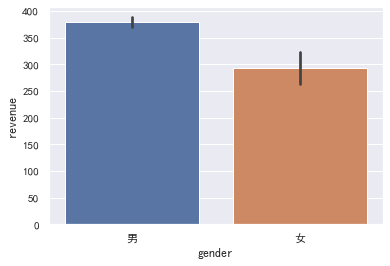

In [127]:
sns.barplot(x='gender', y = 'revenue', data=data)

**了解的信息二：不同年龄的用户下单比较**

c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

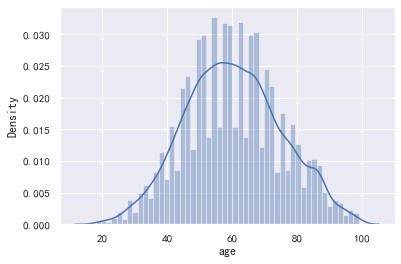

In [128]:
sns.distplot(data.age)

In [129]:
data.age = pd.cut(data.age, bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110])

In [130]:
data.age

0        (50, 60]
1        (50, 60]
2        (70, 80]
5        (70, 80]
6        (50, 60]
           ...   
29436    (40, 50]
29440    (20, 30]
29443    (30, 40]
29448    (50, 60]
29450    (60, 70]
Name: age, Length: 16716, dtype: category
Categories (10, interval[int64, right]): [(-1, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 110]]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(-1, 10]'),
  Text(1, 0, '(10, 20]'),
  Text(2, 0, '(20, 30]'),
  Text(3, 0, '(30, 40]'),
  Text(4, 0, '(40, 50]'),
  Text(5, 0, '(50, 60]'),
  Text(6, 0, '(60, 70]'),
  Text(7, 0, '(70, 80]'),
  Text(8, 0, '(80, 90]'),
  Text(9, 0, '(90, 110]')])

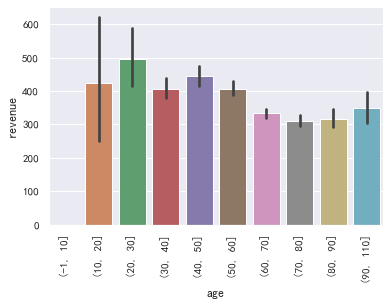

In [131]:
sns.barplot(x='age', y='revenue', data=data)
plt.xticks(rotation=90)

c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='engaged_last_30', ylabel='count'>

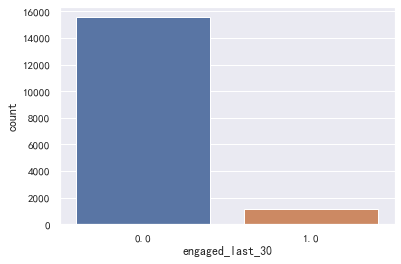

In [132]:
sns.countplot(data.engaged_last_30)

**了解信息三：用户生命周期的比较**

c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='lifecycle', ylabel='count'>

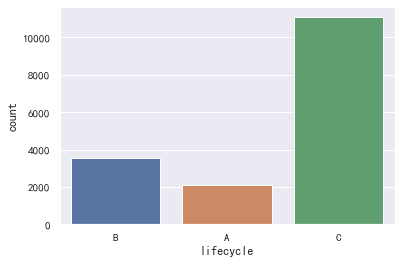

In [133]:
sns.countplot(data.lifecycle)

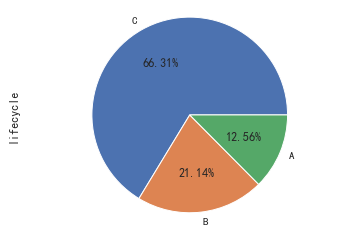

In [134]:
data.lifecycle.value_counts().plot(kind="pie", autopct="%.2f%%")
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='lifecycle', ylabel='revenue'>

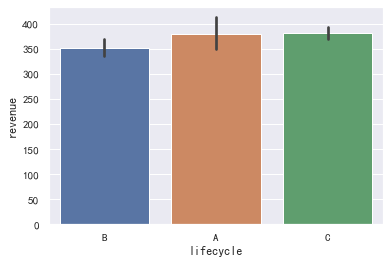

In [135]:
sns.barplot(x='lifecycle', y = "revenue", data=data)

<AxesSubplot:xlabel='lifecycle', ylabel='previous_order_amount'>

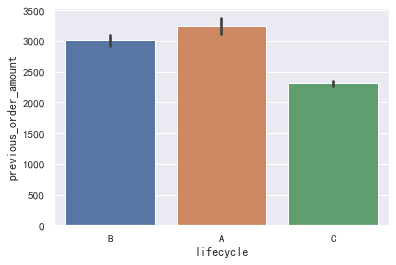

In [136]:
sns.barplot(x='lifecycle', y = 'previous_order_amount', data=data)

**信息：最近一次下单的时间分布**

In [140]:
data.rename(columns={' days_since_last_order ':'days_since_last_order'}, inplace = True)

c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_since_last_order', ylabel='Density'>

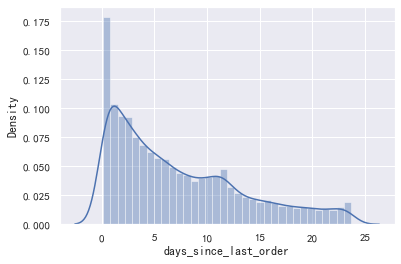

In [141]:
sns.distplot(data.days_since_last_order)